# Standard and Poor Price Prediction using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model [capable of predicting the unique trend of a stock/index based on its mean closing price.]
[capable of predicting tomorrow's S&P Index price given historical data]
The model would have been backtested using 20+ years of historical data in order to be confident of the predictions it makes.

Why are we not predicting the absolute price?
The problem with would be model generalization, where it might perform well in training data but suck in the world.
We care more about the directionality of the stock than the absolute price.

We're going to take the following approach:

    1.Problem definition
    2.Data
    3.Evaluation
    4.Features
    5.Modelling
    6.Experimentation
    
    
## 1. Problem Definition
    
    
## 2. Data
Data used throughout this project is sourced from the S&P Wikipedia Page.

https://en.wikipedia.org/wiki/S%26P_500


## 3. Evaluation


## 4. Features

Project Workflow
- Downloading data on the S&P500 Index
- Clean the data and use it to train a model
- Perform Backtesting to evaluate how good the models are
- Add more predictors to improve accuracy

In [1]:
# Install the yahoo finance library to download daily stock and index prices
#!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/8d/51/9f26741aeeb149fe75b30bceee389cf9920f9458d0f213539398aa217b99/yfinance-0.2.52-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:-

In [1]:
# Import some necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [7]:
# Set the ticker of our interest
sp500 = yf.Ticker("AAPL")

In [10]:
tickers = yf.Tickers('MSFT AAPL GOOG')
tickers
tickers.tickers['MSFT'].info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [8]:
 # Query historical prices from when the index was first created, returns a pandas dataframe
sp500 = sp500.history(period = "max")
sp500

$A3456ON: possibly delisted; no timezone found


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [6]:
# Each row represents the price for a different trading day
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-06-02 00:00:00-04:00,0.000000,1.094085,1.086591,1.086591,118800,0.0,0.0
1980-06-03 00:00:00-04:00,0.000000,1.101579,1.086591,1.101579,141750,0.0,0.0
1980-06-04 00:00:00-04:00,0.000000,1.101579,1.094085,1.101579,102600,0.0,0.0
1980-06-05 00:00:00-04:00,0.000000,1.109071,1.094084,1.109071,575100,0.0,0.0
1980-06-06 00:00:00-04:00,0.000000,1.116566,1.094085,1.094085,88425,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,371.000000,377.649994,368.920013,376.799988,1253500,0.0,0.0
2025-01-28 00:00:00-05:00,377.619995,377.619995,370.269989,371.480011,1099900,0.0,0.0
2025-01-29 00:00:00-05:00,370.209991,371.510010,366.350006,366.739990,952300,0.0,0.0


In [5]:
#sp500.reset_index(inplace=True)

#sp500['Date'] = sp500['Date'].dt.strftime('%Y-%m-%d')


In [9]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-22 00:00:00-05:00,219.789993,224.119995,219.789993,223.830002,64126500,0.0,0.0
2025-01-23 00:00:00-05:00,224.740005,227.029999,222.300003,223.660004,60234800,0.0,0.0
2025-01-24 00:00:00-05:00,224.779999,225.630005,221.410004,222.779999,54697900,0.0,0.0


In [10]:
sp500.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [8]:
#sp500 =sp500.set_index('Date')
#sp500

<Axes: xlabel='Date'>

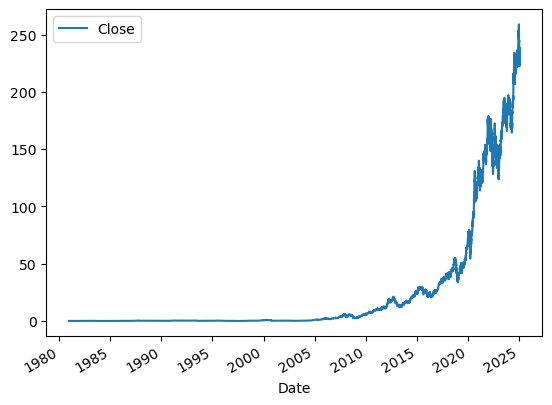

In [11]:
sp500.plot.line(y = 'Close', use_index = True)

In [12]:
del sp500['Dividends']
del sp500['Stock Splits']

 ## Setting up our target for machine learning
 
Will the price go up or down tomorrow?
We will not be predicting the actual price

In [13]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.093678
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.086802
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.088951
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.091530
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.097116
...,...,...,...,...,...,...
2025-01-22 00:00:00-05:00,219.789993,224.119995,219.789993,223.830002,64126500,223.660004
2025-01-23 00:00:00-05:00,224.740005,227.029999,222.300003,223.660004,60234800,222.779999
2025-01-24 00:00:00-05:00,224.779999,225.630005,221.410004,222.779999,54697900,229.860001


In [15]:
# Our target column indicates wether the closing price increased between today and the previous day
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [16]:
sp500.tail()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2025-01-22 00:00:00-05:00,219.789993,224.119995,219.789993,223.830002,64126500,223.660004,0
2025-01-23 00:00:00-05:00,224.740005,227.029999,222.300003,223.660004,60234800,222.779999,0
2025-01-24 00:00:00-05:00,224.779999,225.630005,221.410004,222.779999,54697900,229.860001,1
2025-01-27 00:00:00-05:00,224.020004,232.149994,223.979996,229.860001,94863400,238.259995,1
2025-01-28 00:00:00-05:00,230.850006,240.190002,230.809998,238.259995,75633300,NaN,0


In [17]:
# Removing hostorical data 
sp500 = sp500.loc["1990-01-01":].copy()

In [18]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.248055,0.263889,0.246296,0.262129,183198400,0.263888,1
1990-01-03 00:00:00-05:00,0.267408,0.267408,0.263888,0.263888,207995200,0.264769,1
1990-01-04 00:00:00-05:00,0.269167,0.272685,0.262129,0.264769,221513600,0.265649,1
1990-01-05 00:00:00-05:00,0.265649,0.269167,0.260370,0.265649,123312000,0.267408,1
1990-01-08 00:00:00-05:00,0.263889,0.267408,0.260370,0.267408,101572800,0.264769,0
...,...,...,...,...,...,...,...
2025-01-22 00:00:00-05:00,219.789993,224.119995,219.789993,223.830002,64126500,223.660004,0
2025-01-23 00:00:00-05:00,224.740005,227.029999,222.300003,223.660004,60234800,222.779999,0
2025-01-24 00:00:00-05:00,224.779999,225.630005,221.410004,222.779999,54697900,229.860001,1


## Training an Initial Machine Learning Model

Using cross validation to split time series data leads to a model with amazing training results and awful results in the real world. This is because this way of splitting data does not take the time series nature of data into account.
You might be using future data to predict the past which you cannot do in the real world and will result in leakage (when you leak information to the model)

i.e if i told myself the price of a stock in 30 days and want to predict the price it will be tomorrow, i would find it easier to do that than if i didn't know the price in 30 days.


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

# Split last 100 rows into test set and everything else into train.
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

## Model Evaluation
Next step involves measuring how accurate the model is.
Error metric is determined by specific use case, the assumption is this model will be used to buy stock

In [18]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [19]:
preds = pd.Series(preds, index = test.index)

In [20]:
precision_score(test["Target"], preds)

0.6363636363636364

### This is not a very good precision score.
Everytime it predicted the price goes up it only got it correct (0.5) half the time.


Lets improve this model and get better predictions.

In [21]:
combined = pd.concat([test["Target"], preds], axis = 1)

<Axes: xlabel='Date'>

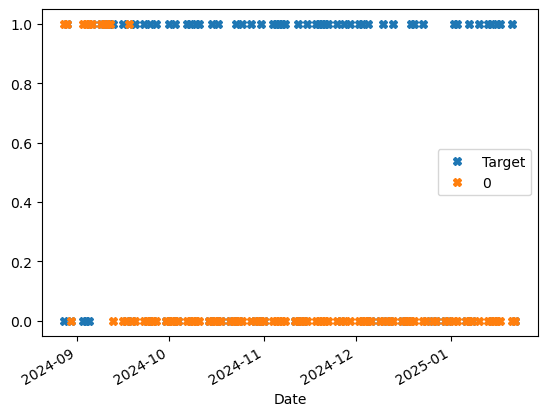

In [22]:
combined.plot(
    style='X')

## Building a Backtesting System

Backtesting evaluates the effectiveness of a trading strategy by running it against historical data to see how it would have fared.

In [26]:
def predict (train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [27]:
# Each year has approximately 250 trading days,  The function starts with the first 10 years then test on the eleventh year.
# This goes on iteratively for each *step*

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i +step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [28]:
predictions = backtest(sp500, model, predictors)

In [29]:
predictions

,Target,Predictions
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,1,0
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,0
...,...,...
2025-01-15 00:00:00-05:00,0,0
2025-01-16 00:00:00-05:00,1,0
2025-01-17 00:00:00-05:00,1,0


In [30]:
predictions["Predictions"].value_counts()

Predictions
0    3695
1    2635
Name: count, dtype: int64

In [31]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5286527514231499

In [32]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.536177
0    0.463823
Name: count, dtype: float64

## Adding Additional Predictors to Our Model
Is the price today higher that it was last week, two months ago?
We can use those inputs to determine if the stock will go up or down.
We calculate the mean close price for the last two days. last week,3 months, year and calculate the ratio between the today's closing price and the price in those period in order to determine the magnitude of increase of the market.

If the market has gone up a lot, it might be due for a down turn.
If the market has gone down a lot, it might be due for a upswing.

We are giving the algortihm more information to help it make better predictions.

In [37]:
horizons = [2,5,60,250,1000]

new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [40]:
sp500 = sp500.dropna()

In [41]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-14 00:00:00-05:00,5859.270020,5871.919922,5805.419922,5842.910156,4142280000,5949.910156,1,1.000573,2.0,0.995947,3.0,0.984900,33.0,1.068121,144.0,1.286331,527.0
2025-01-15 00:00:00-05:00,5905.209961,5960.609863,5905.209961,5949.910156,4544570000,5937.339844,0,1.009073,2.0,1.012774,4.0,1.002631,34.0,1.086719,145.0,1.309280,528.0
2025-01-16 00:00:00-05:00,5963.609863,5964.689941,5930.720215,5937.339844,4285810000,5996.660156,1,0.998943,1.0,1.009978,3.0,1.000308,33.0,1.083508,144.0,1.305916,527.0


## Improving our Model

In [42]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [43]:
def predict (train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [44]:
predictions = backtest(sp500, model, new_predictors)

In [45]:
predictions["Predictions"].value_counts()

Predictions
0.0    4471
1.0     858
Name: count, dtype: int64

In [46]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5769230769230769